#### MSDS 7331: Lab 3 - Clustering Analysis
#### Team: Scott Anderwald, Marvin Scott, Salomon Gilles, Earl Shaw 
#### Bank Marketing Data 
#### April 16, 2017


### Business Understanding - Data Set Insight
In this project, our objective is to use several clustering algorithms to form clusters from a bank marketing dataset to potentially offer bank management and the marketing division more insight into the bank's core customer base. These clusters should help provide insight to further fine tune current and future financial products offered by the bank, in addition to marketing campaigns directed to bank customers. Three clustering algorithms will be used to cluster the data, namely: 'K-Means', 'Hierarchical Aggloremative', and 'DBSCAN'.

The raw data represents data collected by a Portuguese bank over several direct marketing campaigns to its customers, primarily by phone. All customer contact was carried out by bank representatives without the aid of automated calls. Data from the campaigns was provided in a flat file report based on information used by the representatives during the call. There were a total of 17 campaigns executed between May 2008 and November 2010. The data set provided by the UCI Machine Learning Repository contained 41,188 records and 21 attributes including 1 target variable, which is represented in the raw data as 'y', with values of 'yes' or 'no, indicating whether or not the customer signed up for the investment product. Each observation in the data set represents a customer contacted during a campaign. Given the possibility of duplicate contacts, the only duplicate records removed were those in which all attributes contained the same information, which will not affect clustering the data. Additionally, it seems unlikely that a customer would have been contacted more than once and each attribute had the same value. For example, if on the first call, the bank representative spoke with the customer for 5 minutes, it doesn't seem reasonable that on a second or third call, the contact duration also lasted 5 minutes, along with other variables remaining static that could potentially change. This, along with other situations lead to the removal of duplicates of this sort. Also, as noted in several box plots provided in Lab 1, outliers don't appear to be an issue and won't have an impact on resulting clusters. Finally, considering the raw data contained a class label, for the purposes of this analysis, the class label was removed. This was necessary since clustering algorithms represent an unsupervised learning approach to mining insights from data. This path was taken since it's very probable that given the quantity of data collected by the bank on its customers, the need will likely arise to better ascertain the customers it intends to serve and market to. This will assist in leading all product and marketing efforts towards a more efficient and productive outcome, providing the most bang for the costs and efforts involved.

The clustering algorithms used will be assessed based on the insights they are able to provide in regards to bank customers. If the clusters yield very little information on possible groupings within the data, more analysis and possibly a different approach will be required. Discerning possible groupings within the data will be helpful as the bank potentially plans to create new financial products and market these along with current offerings to customers. A survey of consumers conducted by the Corporate Executive Board as detailed in an article by Harvard Business Review, revealed that customers valued simplicity regarding marketing materials. That is, they would be more likely to purchase a product, continue purchasing it, and/or tell others about, if they didn't feel overwhelmed by the product's marketing, but were able to receive the most appropriate information in a simple and efficient manner. Achieiving this type of outcome becomes more of a possibility the better the bank knows its customers. Clustering analysis serves as one step on the path towards helping the bank acquire this knowledge.

#### Sources:
1. http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
2. S. Moro, P. Cortez, P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing". Decision Support Systems, Elsevier, 62:22-31, June 2014. http://bru-unide.iscte.pt/RePEc/pdfs/13-06.pdf
3. Spenner, Patrick and Freeman, Karen. "To Keep Your Customers, Keep It Simple." Harvard Business Review, May 2012, https://hbr.org/2012/05/to-keep-your-customers-keep-it-simple. Accessed 14 Apr 2017.

### Loading Raw Data

In [1]:
# Loading relevant libraries used throughout the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

#Loading the "bank_data.csv" file
bank=pd.read_csv('C:\\Users\\Earl\\Documents\\MSDS 7331\\Data\\Lab 1\\bank_data.csv')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Data Understanding 1

As covered in our prior analysis, outliers are not an issue that will impact clustering the raw data. Considering our interest is in discovering possible groupings and patterns within the data, we've restricted our analysis to those variables relevant to being able to discern the most about the bank customer. Specifically, we've chosen to keep the following variables: 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', and 'nr.employed'. Insight into the meaning of each of these variables is provided in the "Variable Meaning and Types" section below. Also, duplicates will be removed in which all attributes of an observation contain identical values to other observations. This will not have an impact on clustering the data, but is primarily done to eliminate redundancies in the data. 11 observations with duplicates were removed, leaving 41,176 observations for determining the clusters. Additionally, missing values will not compromise the analysis, as all values are populated. 41,188 observations are initially available prior to data transformations, processing, etc. In all, 12 features useful for clustering are included in the data.

Checking for Missing Values - No missing values to remove or impute.

In [2]:
# Checking any possible missing values
print ('Missing Values:'),np.count_nonzero(bank.isnull())
# np.count_nonzero(bank['age'].isnull())
# np.count_nonzero(bank['job'].isnull())
# np.count_nonzero(bank['marital'].isnull())
# np.count_nonzero(bank['education'].isnull())
# np.count_nonzero(bank['default'].isnull())
# np.count_nonzero(bank['housing'].isnull())
# np.count_nonzero(bank['loan'].isnull())
# np.count_nonzero(bank['contact'].isnull())
# np.count_nonzero(bank['month'].isnull())
# np.count_nonzero(bank['day_of_week'].isnull())
# np.count_nonzero(bank['duration'].isnull())
# np.count_nonzero(bank['campaign'].isnull())
# np.count_nonzero(bank['pdays'].isnull())
# np.count_nonzero(bank['previous'].isnull())
# np.count_nonzero(bank['poutcome'].isnull())
# np.count_nonzero(bank['emp.var.rate'].isnull())
# np.count_nonzero(bank['cons.price.idx'].isnull())
# np.count_nonzero(bank['cons.conf.idx'].isnull())
# np.count_nonzero(bank['euribor3m'].isnull())
# np.count_nonzero(bank['nr.employed'].isnull())
# np.count_nonzero(bank['y'].isnull())

Missing Values: 0


Removing duplicate observations - As mentioned prior, 11 observations were removed, leaving 41,176 total observations for analysis. Also, restricting data set to the variables of interest, i.e. those relevant to discovering more about the customer.

In [3]:
# Removing duplicate observations/clients from dataset
bank2=bank.drop_duplicates()
bank2.info()

# Keeping variables of interest
bank3=bank2[['age','job','marital','education','default','housing','loan','emp.var.rate','cons.price.idx',
           'cons.conf.idx','euribor3m','nr.employed']]
print ('')
bank3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Transforming variable names to more Python friendly variations.

In [4]:
# Changing variable names to avoid syntax issues within the Python operating environment and to more intuitive names.
# Removing variable "pdays" considering roughly 96% of the observations have the value '999'
bank4=bank3.rename(columns={'job':'job_type','marital':'marital_status','education':'education_level',
                            'default':'curr_credit_default','housing':'curr_housing_loan',
                            'loan':'curr_personal_loan','emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx',
                            'cons.conf.idx':'cons_conf_idx','nr.employed':'num_employees_qtr','y':'target'})
# New variable names:
# -------------------
# age = age
# job = job_type
# marital = marital_status
# education  = education_level
# default = curr_credit_default
# housing = curr_housing_loan
# loan = curr_personal_loan
# emp.var.rate = emp_var_rate
# cons.price.idx = cons_price_idx
# cons.conf.idx = cons_conf_idx
# euribor3m = euribor3m
# nr.employed = num_employees_qtr
#bank3a=bank3.drop('pdays',axis=1)
bank4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 12 columns):
age                    41176 non-null int64
job_type               41176 non-null object
marital_status         41176 non-null object
education_level        41176 non-null object
curr_credit_default    41176 non-null object
curr_housing_loan      41176 non-null object
curr_personal_loan     41176 non-null object
emp_var_rate           41176 non-null float64
cons_price_idx         41176 non-null float64
cons_conf_idx          41176 non-null float64
euribor3m              41176 non-null float64
num_employees_qtr      41176 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 4.1+ MB


Variable Meanings and Types

age - "Age of Customer", numeric  
job_type - "Job of the customer", categorical (e.g. housemaid, blue collar, entrepreneur, etc.)  
marital_status - "Marital status of the customer", categorical (e.g. married, single, etc.)  
education_level - "Education level of the customer", categorical (e.g. high school, university degree, etc.)  
curr_credit_default - "Does the customer have credit in default", categorical (e.g. yes, no)  
curr_housing_loan - "Does the customer have a current house loan", categorical (e.g. yes, no)  
curr_personal_loan- "Method of contact for the customer", categorical (e.g. yes, no)  
emp_var_rate- "Employment Variation Rate", i.e. a measure of the employment rate, numeric  
cons_price_idx - "Consumer Price Index", numeric  
cons_conf_idx - "Consumer Confidence Index", numeric  
euribor3m - Euribor Three Month Rate, i.e. Euro Interbank Offered Rate or the rate banks charge each other for  
short term loans, numeric  
num_employees_qtr - "Number of Employees", i.e. an economy measure, numeric  

### Data Understanding 2 - Correlation Revisited

We revisited the correlation heatmap provided in Lab 1 to be sure any redundant features are located and removed before proceeding with clustering the data. If two or more features are strongly correlated (i.e. a Pearson Correlation Coefficient close to 1), only one of the features will remain in the data so the information provided by the feature is preserved, while any redundancy is eliminated. The features: "emp_var_rate", which is correlated with 'euribor3m' (0.97) and 'num_employees_qtr' (0.91) and "num_employees_qtr", which is correlated with 'emp_var_rate' (0.91) and 'euribor3m' (0.95) will be removed.

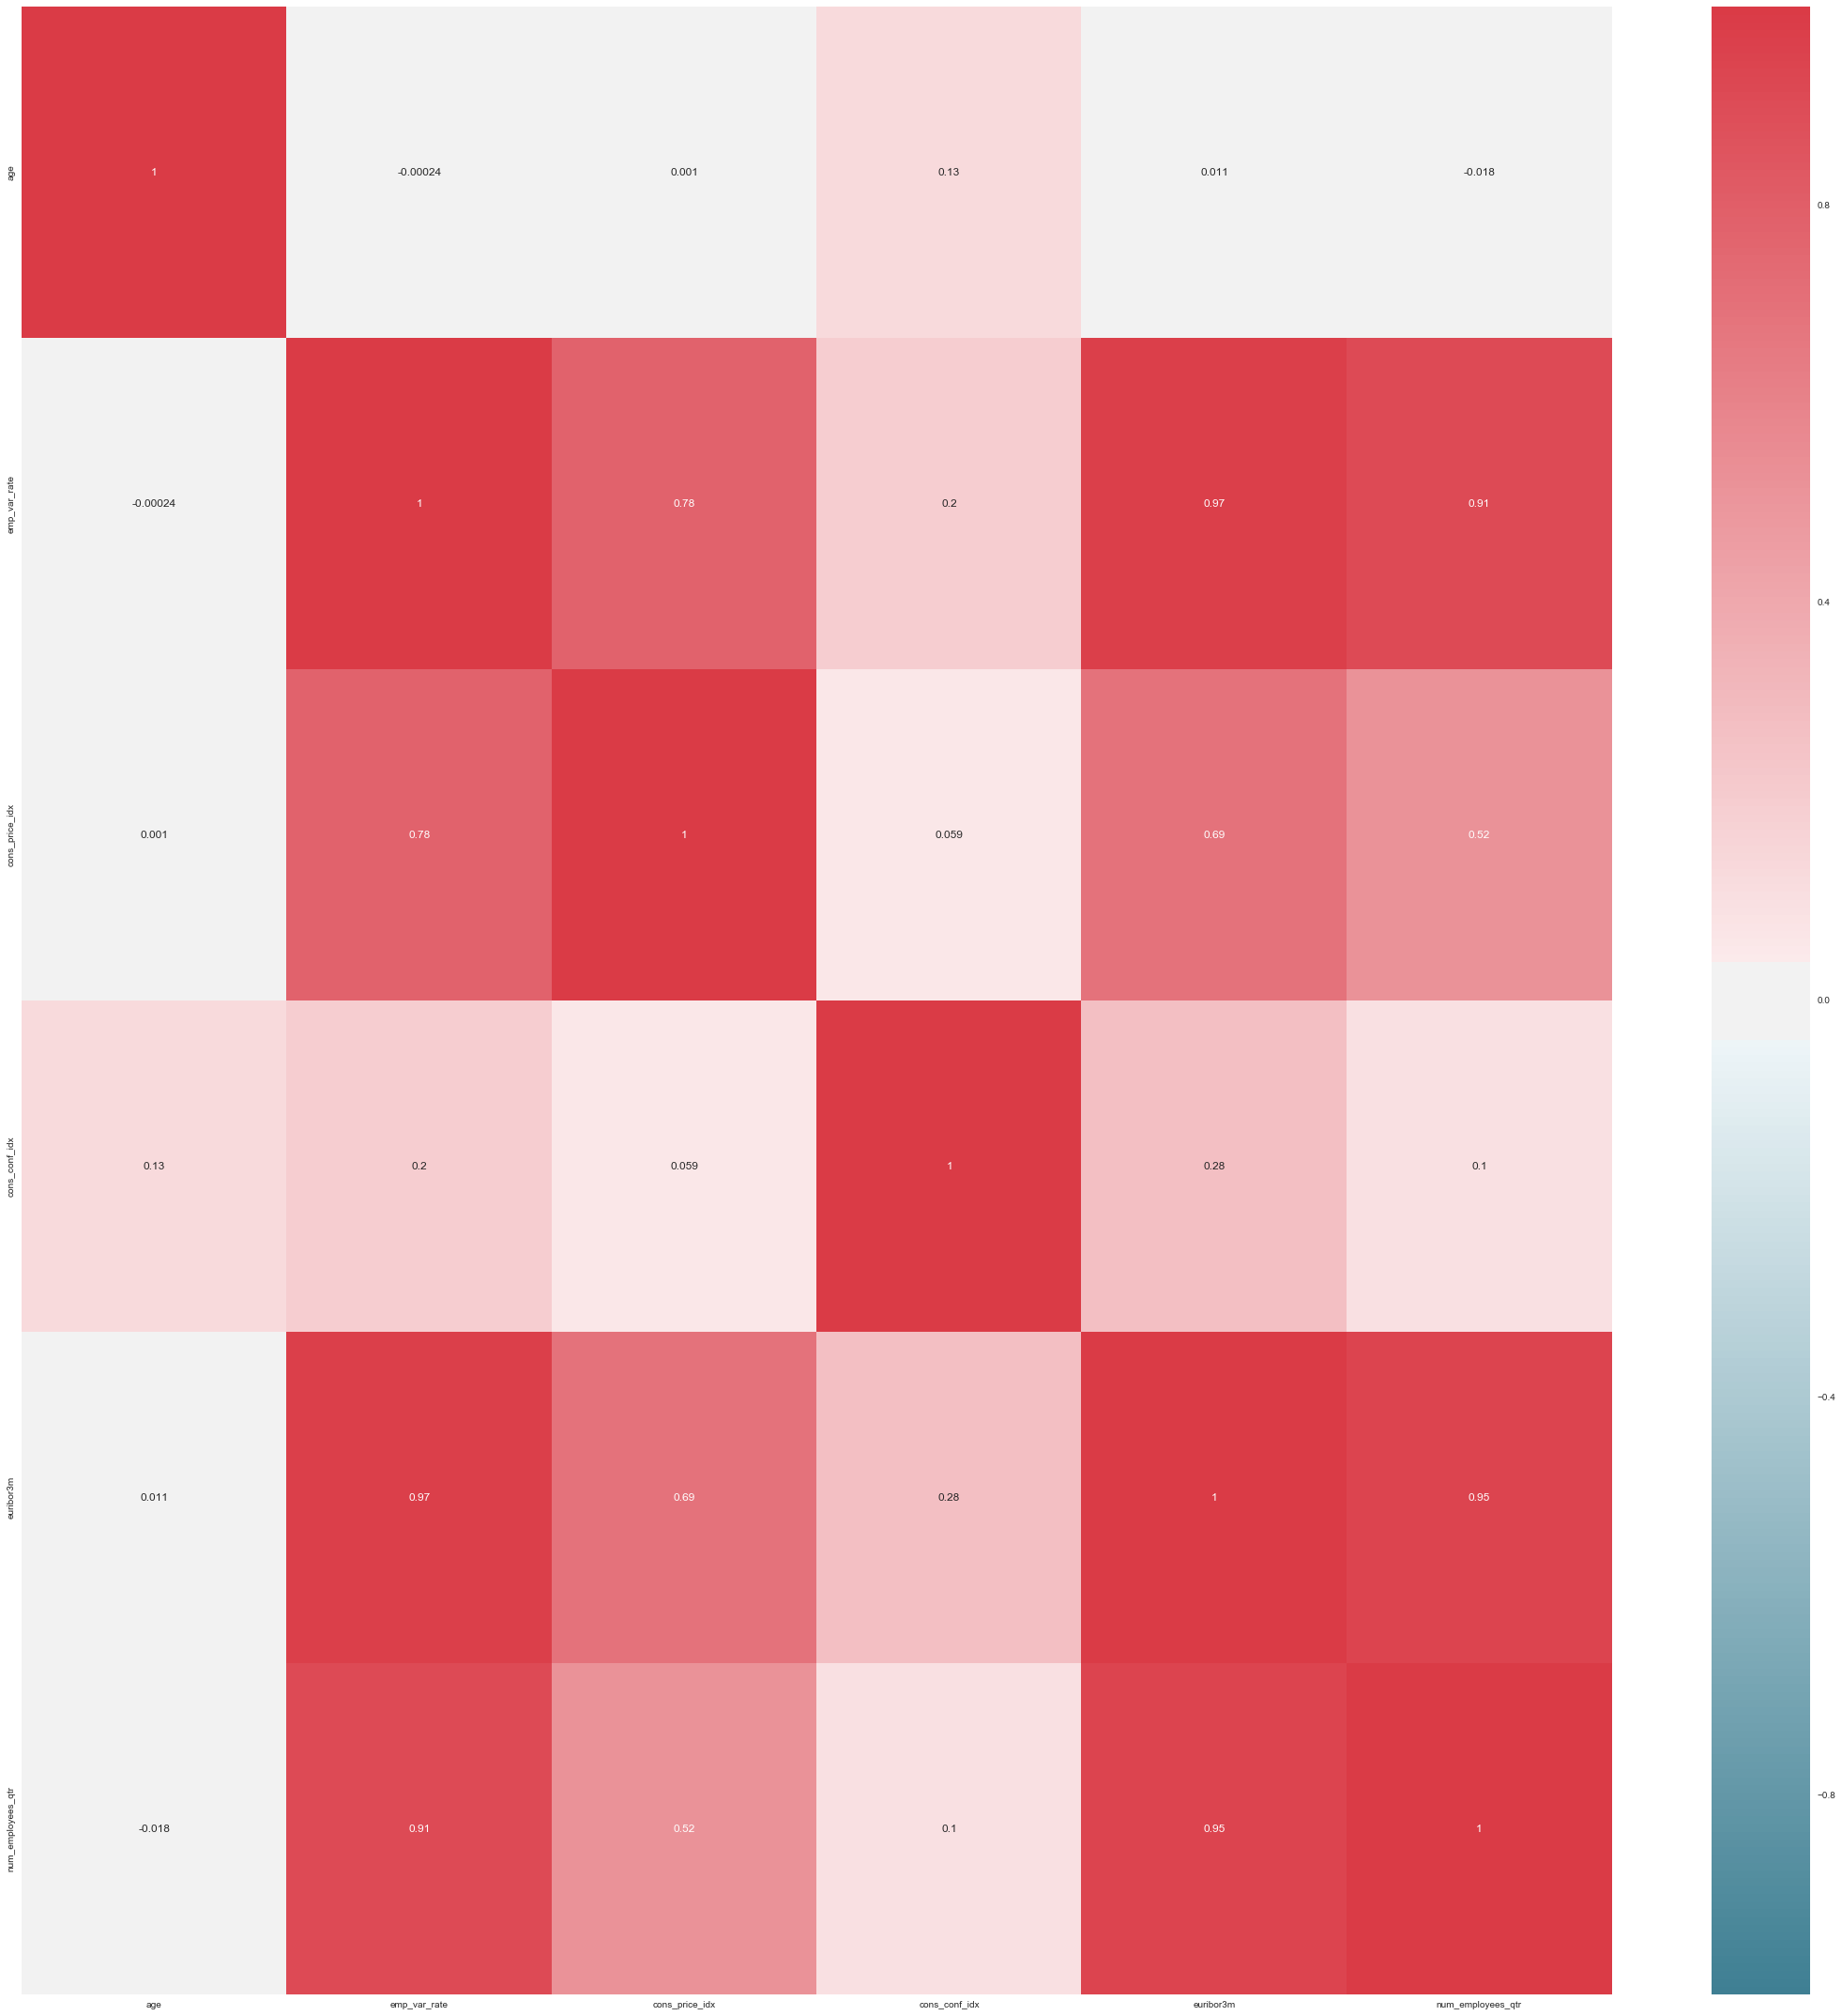

In [5]:
# Determining any correlations among features
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(bank4.corr(), cmap=cmap, annot=True)
f.tight_layout()

Removing variables with a high degree of correlation with other variables, i.e. with a Pearson Correlation Coefficient close to 1. This leaves us with 10 features to use for a clustering analysis.

In [6]:
# Removing highly correlated variables as determined by the Pearson Correlation Coefficient. 
del bank4['num_employees_qtr']
del bank4['emp_var_rate']
print (bank4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 10 columns):
age                    41176 non-null int64
job_type               41176 non-null object
marital_status         41176 non-null object
education_level        41176 non-null object
curr_credit_default    41176 non-null object
curr_housing_loan      41176 non-null object
curr_personal_loan     41176 non-null object
cons_price_idx         41176 non-null float64
cons_conf_idx          41176 non-null float64
euribor3m              41176 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB
None


### Modeling and Evaluation 1 - Train and Adjust Parameters 

#### Data wrangling to transform categorical variables into dummy variables and to adjust the variable names, if needed.

In [7]:
# Transforming categorical variables into dummy variables to be used in clustering algorithm
bank5=pd.get_dummies(bank4)
X=bank5.rename(columns={'job_type_admin.':'job_type_admin','education_level_basic.4y':'education_level_basic_4y',
                            'education_level_basic.6y':'education_level_basic_6y',
                            'education_level_basic.9y':'education_level_basic_9y',
                            'education_level_high.school':'education_level_high_school',
                            'education_level_professional.course':'education_level_professional_course',
                            'education_level_university.degree':'education_level_university_degree',
                            'job_type_blue-collar':'job_type_blue_collar',
                            'job_type_self-employed':'job_type_self_employed'})
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 37 columns):
age                                    41176 non-null int64
cons_price_idx                         41176 non-null float64
cons_conf_idx                          41176 non-null float64
euribor3m                              41176 non-null float64
job_type_admin                         41176 non-null float64
job_type_blue_collar                   41176 non-null float64
job_type_entrepreneur                  41176 non-null float64
job_type_housemaid                     41176 non-null float64
job_type_management                    41176 non-null float64
job_type_retired                       41176 non-null float64
job_type_self_employed                 41176 non-null float64
job_type_services                      41176 non-null float64
job_type_student                       41176 non-null float64
job_type_technician                    41176 non-null float64
job_type_unemployed      

In [8]:
#Converting numpy array to matrix to obtain proper shape
print 'Shape of X:',X.shape
print ''
X_m=np.asmatrix(X)
print 'Shape of Matrix X', X_m.shape
print X_m.dtype

Shape of X: (41176, 37)

Shape of Matrix X (41176L, 37L)
float64


#### Scaling features and applying Principal Component Analysis to render all features numeric and to potentially reveal clusters in the data.

In [9]:
# Feature standardization by centering and scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X_m)

#Applying PCA
from sklearn.decomposition import PCA
pca_2 = PCA(n_components = 2)
pca_4 = PCA(n_components = 4)
pca_6 = PCA(n_components = 6)
pca_8 = PCA(n_components = 8)
pca_10 = PCA(n_components = 10)
pca_15 = PCA(n_components = 15)
pca_20 = PCA(n_components = 20)
pca_25 = PCA(n_components = 25)
pca_30 = PCA(n_components = 30)

X_2 = pca_2.fit_transform(X_sc)
X_4 = pca_4.fit_transform(X_sc)
X_6 = pca_6.fit_transform(X_sc)
X_8 = pca_8.fit_transform(X_sc)
X_10 = pca_10.fit_transform(X_sc)
X_15 = pca_15.fit_transform(X_sc)
X_20 = pca_20.fit_transform(X_sc)
X_25 = pca_25.fit_transform(X_sc)
X_30 = pca_30.fit_transform(X_sc)

explained_variance_pca_2= pca_2.explained_variance_ratio_
print "Explained Variance from PCA, n_components=2:\n\t",explained_variance_pca_2
print "Explained Variance from PCA Ratio Sum, n_components=2",pca_2.explained_variance_ratio_.cumsum()
print ''

explained_variance_pca_4 = pca_4.explained_variance_ratio_
print "Explained Variance from PCA, n_components=4:\n\t",explained_variance_pca_4
print "Explained Variance from PCA Ratio Sum, n_components=4:\n\t",pca_4.explained_variance_ratio_.cumsum()
print ''

explained_variance_pca_6 = pca_6.explained_variance_ratio_
print "Explained Variance from PCA, n_components=6:\n\t",explained_variance_pca_6
print "Explained Variance from PCA Ratio Sum, n_components=6:\n\t",pca_6.explained_variance_ratio_.cumsum()
print ''

explained_variance_pca_8 = pca_8.explained_variance_ratio_
print "Explained Variance from PCA, n_components=8:\n\t",explained_variance_pca_8
print "Explained Variance from PCA Ratio Sum, n_components=6:\n\t",pca_8.explained_variance_ratio_.cumsum()
print ''

explained_variance_pca_10 = pca_10.explained_variance_ratio_
print "Explained Variance from PCA, n_components=10:\n\t",explained_variance_pca_10
print "Explained Variance from PCA Ratio Sum, n_components=10:\n\t",pca_10.explained_variance_ratio_.cumsum()
print ''

explained_variance_pca_15 = pca_15.explained_variance_ratio_
print "Explained Variance from PCA, n_components=15:\n\t",explained_variance_pca_15
print "Explained Variance from PCA Ratio Sum, n_components=15:\n\t",pca_15.explained_variance_ratio_.cumsum()
print ''

explained_variance_pca_20 = pca_20.explained_variance_ratio_
print "Explained Variance from PCA, n_components=20:\n\t",explained_variance_pca_20
print "Explained Variance from PCA Ratio Sum, n_components=20:\n\t",pca_20.explained_variance_ratio_.cumsum()
print ''

explained_variance_pca_25 = pca_25.explained_variance_ratio_
print "Explained Variance from PCA, n_components=25:\n\t",explained_variance_pca_25
print "Explained Variance from PCA Ratio Sum, n_components=25:\n\t",pca_25.explained_variance_ratio_.cumsum()
print ''

explained_variance_pca_30 = pca_30.explained_variance_ratio_
print "Explained Variance from PCA, n_components=30:\n\t",explained_variance_pca_30
print "Explained Variance from PCA Ratio Sum, n_components=30:\n\t",pca_30.explained_variance_ratio_.cumsum()
print ''

Explained Variance from PCA, n_components=2:
	[ 0.08195555  0.0626599 ]
Explained Variance from PCA Ratio Sum, n_components=2 [ 0.08195555  0.14461545]

Explained Variance from PCA, n_components=4:
	[ 0.08192453  0.06260256  0.05523352  0.05360964]
Explained Variance from PCA Ratio Sum, n_components=4:
	[ 0.08192453  0.14452709  0.19976061  0.25337025]

Explained Variance from PCA, n_components=6:
	[ 0.08195455  0.06263702  0.05519347  0.05348538  0.04895598  0.04813492]
Explained Variance from PCA Ratio Sum, n_components=6:
	[ 0.08195455  0.14459158  0.19978504  0.25327043  0.30222641  0.35036132]

Explained Variance from PCA, n_components=8:
	[ 0.08194514  0.06264581  0.0551335   0.05337626  0.04892924  0.04829238
  0.04582367  0.04476753]
Explained Variance from PCA Ratio Sum, n_components=6:
	[ 0.08194514  0.14459095  0.19972445  0.25310071  0.30202995  0.35032233
  0.396146    0.44091353]

Explained Variance from PCA, n_components=10:
	[ 0.08195098  0.06265546  0.0552542   0.05360

#### Evaluating PCA results

After trying multiple values for the number of principal components as reflected above, when we include 20 principal components, more of the variability in the features is obtained as represented in the Explained Variance Ratio sum of 0.815, which means that with 20 principal components we are able to explain ~82% of the variability in the data, which is a noticeable improvement, since we are able to explain most of the variability in the data with less than the original 37 features. "25" components explained ~93% of the variability, and "30" components explained 100% of the variability, but this number of components contributed to extended processing times, so we settled on "20". Additionally, before applying PCA, we scaled our data so that each feature has unit variance using StandardScaler. This prevented PCA from being heavily influenced by those features with large variances, which would skew the components.

#### Using "Elbow" Method to determine optimal number of clusters

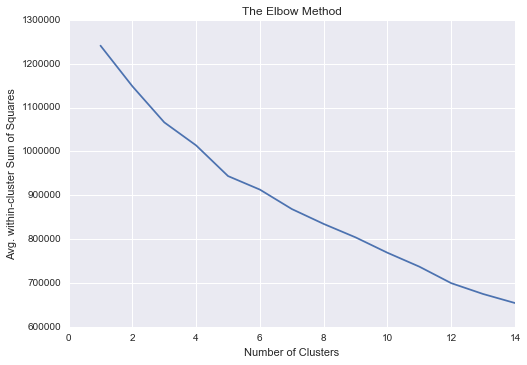

In [10]:
#Using the elbow method to find the optimal number of clusters
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_20)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Avg. within-cluster Sum of Squares')
plt.show()
#print kmeans.cluster_centers_
#print ''
#labels=kmeans.fit_predict(X_20)
#labels_m=np.asmatrix(labels)
#print labels.shape
#print labels_m.shape
#print ''
#print kmeans.inertia_

Based on the "Elbow" method to determine the number of clusters, in the graph above it appears the bend or 'elbow' occurs at "5" clusters. There is a slight bend at "3", but the "elbow" is more significant at "5". This means the variance is minimized the most within each cluster when there are "5" clusters total. 

#### Clustering data using "KMeans" clustering algorithm

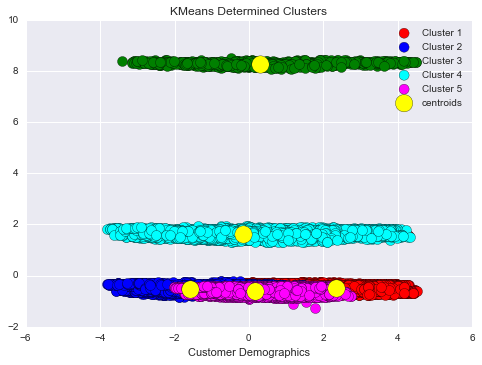

In [11]:
#Applying k-means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_20)

#Visualzing the clusters
plt.scatter(X_20[y_kmeans == 0,0], X_20[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_20[y_kmeans == 1,0], X_20[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_20[y_kmeans == 2,0], X_20[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_20[y_kmeans == 3,0], X_20[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_20[y_kmeans == 4,0], X_20[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow',label = 'centroids')
plt.title('KMeans Determined Clusters')
plt.xlabel('Customer Demographics')
plt.ylabel('')
plt.legend()
plt.show()

The KMeans clustering algorithm, using 5 clusters provides distinct groupings of the data, with clusters 3 and 4 separated the most from the other clusters. Clusters 1, 2, and 5 are distinct, but appear to be very similar for certain characteristics, which contributes to their "stacked" alignment.

#### Clustering data using "Hierarchical Agglomerative" clustering algorithm

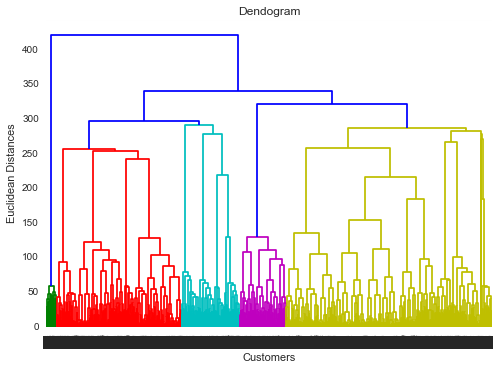

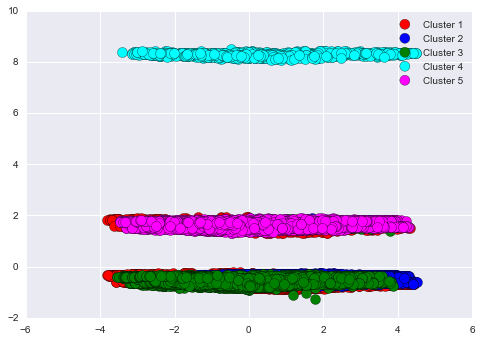

In [12]:
#Using the Dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_20, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customer Demographics')
plt.ylabel('Euclidean Distances')
plt.show()

#Fitting the hiarchial clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_20)

#Visualsing the clusters
plt.scatter(X_20[y_hc == 0,0], X_20[y_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_20[y_hc == 1,0], X_20[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_20[y_hc == 2,0], X_20[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_20[y_hc == 3,0], X_20[y_hc == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_20[y_hc == 4,0], X_20[y_hc == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Hierarchical agglomerative clustering groups the data differently than KMeans, with stacking occuring for clusters 1, 2, 3, and 5 with only cluster 4 a considerable distance away, indicating the customers have a different profile than the other clusters. Judging by the dendrogram, the top blue cluster appears to be the largest cluster. Also, the y-axis in the dendrogram represents the distance between merged clusters. The longest distance between the merged clusters appears to be between the line around 350 and the one at 400, suggesting merging these clusters required bringing together points that were further away. Overall, this doesn't create clusters as clear and distinct as those in KMeans. Based on the KMeans and Hierarchical Agglomerative clustering plots, KMeans appears to provide better, more defined clusters, which would translate into better segmentation of bank customers.

#### Clustering data using "DBSCAN" clustering algorithm

In [19]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

#Compute  DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X_20)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_20, labels))

Estimated number of clusters: 543
Silhouette Coefficient: -0.025


#### DBSCAN Plot of Clusters

C:\Users\Earl\Anaconda2\lib\site-packages\matplotlib\lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


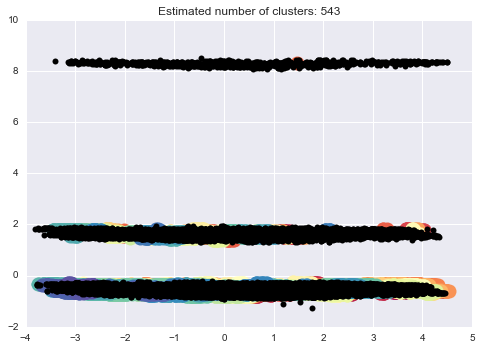

In [20]:
#PLOT Results
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    xy = X_20[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X_20[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

DBSCAN clustering returns an estimate of 543 clusters which is close to 11 times more than that used for KMeans and Hierarchical Agglomerative clustering. Stacking is still evident in the clusters, but there appears to be much more definition in the clusters, aside from the abundance of "noise" present in the black shading. The actual colored sections represent more defined segmentations in the bank's customers, and hence very specific groups of customers to target; but again, the abundance of noise overwhemingly mutes the effect of these clusters.

### Modeling and Evaluation 2 - Evaluate and Compare
According to various research on strategies to compare different clustering algorithms, there are two clear methods often cited, "Adjusted Rand Index (ARI) and "Silhouette Score". While having knowledge of the "ground truth" would be the best method for assessing the accuracy of any clusters determined, this is typically not feasible if the data hasn't been explored before and/or there are no experts with insight into the data. So even with the ARI and Silhouette score, considering there is no benchmark on which to compare these results, it serves only as a "very dim light in a dark room". If class labels were present in the data, a supervised approach could be taken to train a classification model based on the "ground truth", such that future observations could be analyzed according to the right clustering of the data. In light of this, we chose to undertake more of a visual approach to comparing the results, with the thought that, given the objective is to discern groups of customers to create tailored financial products and/or better, more efficient and effective targeted marketing efforts, more clearly defined clusters will better serve the bank's purposes. Considering this, of the three clustering results produced, KMeans appears to offer clear and more distinct clustering of the data. While stacking of clusters is present with KMeans, indicating very similar characteristics for three groups in particular (i.e. Clusters 1, 2, and 5), there is clear and distinct separation among the groups. This will provide the bank with a good starting point on which populations of customers to conduct further analysis on. 

### Modeling and Evaluation 3 - Visualize Results
Refer to cluster plots provided above for 'KMeans', 'Hierarchical Agglomerative', and 'DBSCAN' to view how each alogrithm clustered the data.

### Modeling and Evaluation 4 - Summarize the Ramifications
Considering the KMeans clusters appear to provide more clear and distinct groupings of the data, these results will offer the bank a better feel as to which groups of customers to further investigate for product and marketing related efforts. But due to the multiple binary fields within the data and the need to perform PCA, which causes any relationship with the orginal features to be lost, coupled with the exploratory nature of cluster analysis, it makes it difficult to arrive at a very specific conclusion such as: "Customers with a housing loan who have administrative careers are a good group to target". The cluster results merely show groupings within the data with no indication of probability to engage in a certain action, etc., only that there is something similar in regards to the observations. So further analysis would need to be done on the groupings after cluster analysis; but more important is the request for more numeric attributes. With additional numeric features such as: income, mortgage amounts, account balance, other trade balances, etc., this would provide a more effective cluster analysis, yielding better insights into the customer base. 

To assess how our results correlate with others who have done research and analysis using PCA prior to clustering, we reviewed an article written by two researchers from the University of Washington who sought to examine the effects of PCA on clustering with gene expression data. From their analysis, they determined that overall, they would recommend not using PCA prior to clustering due to the absence of an effective strategy for determining the number of components without external criteria being available. Additionally, they advise caution when interpreting cluster structures due to the difficulty in component selection and the results provided after a PCA analysis. These results demonstrate PCA and clustering is possible, but there exist a variety of issues that still need to be resolved before it becomes a best practice in clustering.

Source:
Yeung, K.Y. and Ruzzo, W.L. “Principal Component Analysis for Clustering Gene Expression Data.” Bioinformatics Journal, vol. 17, no. 9, 2001, pages 763-774, http://www.cs.ust.hk/~qyang/537/Papers/yeungandruzzoPCAbiodata.pdf. Accessed 16 Apr 2017.

### Deployment
Considering the nature of our data, that is, consisting of primarily categorical attributes, and the need to perform PCA analysis due to this, which provides continuous features necessary to calculate distance metrics for clustering, our honest recommendation would be for the bank to provide additional quantitative/continuous attributes on customers to provide a more robust analysis. These attributes would eliminate the need to perform PCA, which would help in discerning which attributes in the data contribute to the cluster groupings. Given that PCA provides eigenvectors which are a linear combination of key features in the data, this presents an issue with discerning the attributes as referenced earlier. Additionally, even in the presence of more continous attributes, further univariate, bivariate, and/or multivariate analysis should be done to gain further insight into the customer base and potential groupings to pursue. 

In its current condition, the cluster analysis isn't very useful to bank management and the marketing division without additional quantitative data. So our initial goal of providing the bank with clusters useful for product creation and targeted marketing efforts did not yield the results desired. Although, with more quantitative data, success becomes more likely. Once an effective solution is determined, the frequency of a cluster analysis update would most likely be an ad-hoc update (i.e. upon request) depending upon potential marketing initiatives and product development under consideration. There wouldn't be a need for regular updates unless the plan was to run a marketing outreach for an extended period, upon which the rate at which new customers are added to the bank's portfolio would need to be determined to get a feel for how quick the population of bank customers changes, presenting a need for a refresh. 

### Exceptional Work
Given the quantity of categorical variables present in our data, this would complicate matters when trying to compute the mean distance for clustering algorithms such as "KMeans". To remedy this, we chose to create dummy variables based on each of our categorical variables and then use Principal Component Analysis (PCA) to render each feature in our data set as a number other than 0 or 1. After trying a variety of options for the number of components, we settled on "20" principal components, which explained ~82% of the variability in our data, which represents less dimensions, given that prior to performing PCA, we had 37 features. Additionally, since each component is a number other than 0 or 1, meaningful distance metrics can be computed by the chosen clustering algorithms to provide some insight into our data. To get a feel for the difference between a cluster analysis prior to PCA, we chose to apply the "KMeans" clustering algorithm to our data before creating any principal components. As can be noted below, "2" clusters were chosen, using the "Elbow" method (which is detailed above) in the absence of PCA. Whereas, when PCA is done prior to clustering, the optimal number of clusters shifts to "5". 

#### Using "Elbow" method to determine optimal clusters prior to PCA.

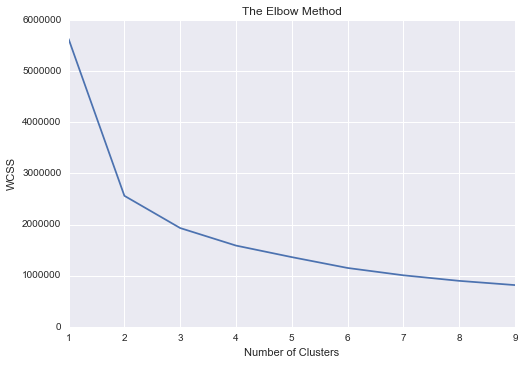

In [13]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_m)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Based on the "Elbow" method to determine the number of clusters prior to PCA, in the graph above it appears the bend or 'elbow' occurs at "2" clusters. This means the variance is minimized within each cluster when there are "2" total. 

#### Using "Elbow" method to determine optimal clusters after selecting 20 principal components with PCA.

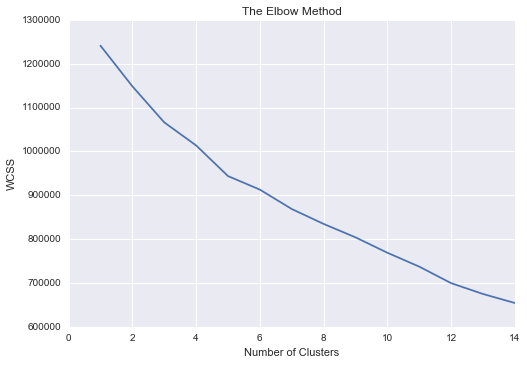

In [15]:
#Using the elbow method to find the optimal number of clusters "post-PCA"
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_20)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Based on the "Elbow" method to determine the number of clusters after selecting 20 principal components with PCA, in the graph above it appears the most significant bend or 'elbow' occurs at "5" clusters. This means the variance is minimized the most within each cluster when there are "5" total. 

#### Clustering data using "KMeans" clustering algorithm "in the absence of PCA"

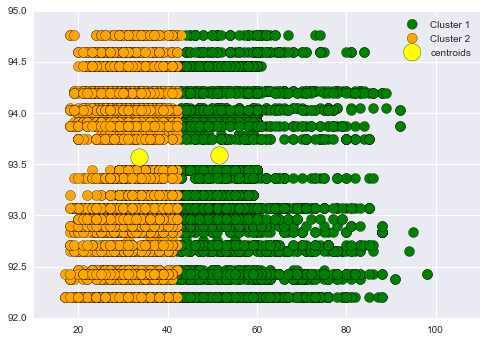

In [17]:
#Applying k-means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_m)

#Visualzing the clusters
plt.scatter(X_m[y_kmeans == 0,0], X_m[y_kmeans == 0,1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X_m[y_kmeans == 1,0], X_m[y_kmeans == 1,1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow',label = 'centroids')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

#### Clustering data using "KMeans" clustering algorithm "after applying PCA"

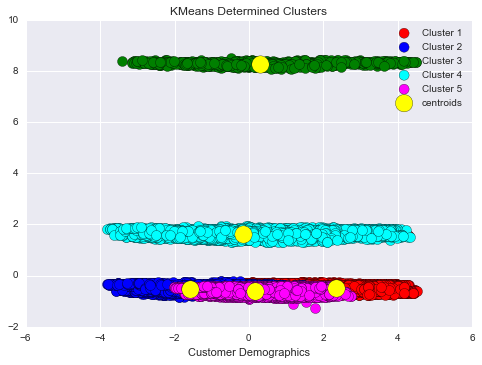

In [18]:
#Applying k-means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_20)

#Visualzing the clusters
plt.scatter(X_20[y_kmeans == 0,0], X_20[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_20[y_kmeans == 1,0], X_20[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_20[y_kmeans == 2,0], X_20[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_20[y_kmeans == 3,0], X_20[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_20[y_kmeans == 4,0], X_20[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow',label = 'centroids')
plt.title('KMeans Determined Clusters')
plt.xlabel('Customer Demographics')
plt.ylabel('')
plt.legend()
plt.show()

#### Summary and Analysis

From the two "elbow" plots provided above for "pre-PCA" and "post-PCA", more clusters are chosen after PCA is applied, suggesting the data is segmented further in the presence of PCA than without. And after applying the KMeans clustering algorithm, as can be noticed when comparing the two KMeans cluster plots above for "pre-PCA" and "post-PCA", evidence of further segmentation and separation is illustrated. In the "pre-PCA" clusters, the grouping is noticeable (i.e. 'green' and 'orange'), however, given the frequency of their occurrence, it would be difficult to glean any real insights from this plot. However, the cluster plot "post-PCA" offers clearer evidence of more specific groupings in the data, with clusters 3 and 4 distinctly separated from the other clusters. While clusters 1 and 2 appear to cluster similarly, cluster 5 is stacked on top of them indicating the binary nature of our data may not have completely been muted with PCA. That is, while we eliminated binary values from our features with PCA, judging by the stacking of cluster 5 on top of clusters 1 and 2, these groupings appear to share extremely similar characteristics, and ultimately the characteristics may be identical. This represents a weakness in the analysis that could possibly be strengthened with additional univariate, bivariate, and/or multivariate analyses on the data to glean further insights helpful to making use of the clusters. One drawback to PCA is that features form linear combinations to create components (i.e. eigenvectors), so breaking these down to determine which specific feature drives a particular cluster is difficult. But this doesn't remove the fact that PCA provides better and more defined clusters than if it were not used. Overall, using PCA prior to performing a cluster analysis on the data opens the door to additional clusters in the data, which could prove helpful towards segmenting specific groups of bank customers to better tailor future bank financial product offerings or to help in offering better and more efficient targeted marketing efforts. But again, as mentioned in the journal article cited prior, caution should be used with this type of strategy, as methodology for component selection is difficult without external criteria, casting doubt on resulting cluster structures. Research and analysis into this issue is ongoing.